In [420]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random

In [421]:
df =pd.read_csv("Data/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [422]:
#Scaling the data
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
scaled_X = sx.fit_transform(df.drop('price',axis=1))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [423]:
try:
    scaled_y = sy.fit_transform(df['price'])
except:
    print("fit_transfrom asks for 3d")

fit_transfrom asks for 3d


In [424]:
try:
    df['price'].reshape(df.shape[0],1)
except:
    print("Reshaping can only be done on the values noton Series object")

Reshaping can only be done on the values noton Series object


In [425]:
df.shape

(20, 3)

In [426]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

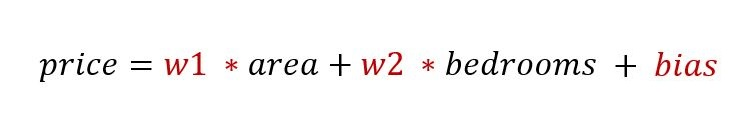
w1,w2, and bias are adjusted accordingly on each epoch

In [427]:
scaled_X.shape,scaled_y.shape
w=np.ones(shape=2)

As the shape of w and scaled_X.T is not feasible for matrix multiplication we need np.dot which results to  

In [428]:
np.dot(scaled_X,w).shape

(20,)

In [429]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features = X.shape[1]
    #Initial assumption on weights and bias
    w = np.ones(number_of_features)
    b = 0
    total_samples = X.shape[0]
    #For the graph
    cost_list = []
    epoch_list =[]
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

In [430]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
cost_list

[0.2768777174681,
 0.16573507027671064,
 0.10212908135956808,
 0.06564235879682481,
 0.04463022365578522,
 0.03245122421764872,
 0.025317339083010492,
 0.021067914076635823,
 0.01847041893523527,
 0.016821657535428185,
 0.015720331469182485,
 0.014937329116527901,
 0.014341749105819087,
 0.0138587099774241,
 0.013445288028074867,
 0.013076793952344979,
 0.012738945874049962,
 0.012423405193086517,
 0.012125230310262438,
 0.011841424159334757,
 0.011570105565415722,
 0.011310036391930275,
 0.01106035160957391,
 0.010820405104702651,
 0.010589681505198633,
 0.010367745666240432,
 0.010154213642862602,
 0.009948735925187012,
 0.009750987675343718,
 0.009560662965348804,
 0.009377471304274599,
 0.009201135478234784,
 0.009031390146006546,
 0.008867980872255637,
 0.008710663416728342,
 0.008559203175573597,
 0.008413374715338717,
 0.008272961365501463,
 0.008137754849850727,
 0.00800755494527638,
 0.007882169161242129,
 0.0077614124359100785,
 0.007645106846431061,
 0.007533081331802613,
 0

In [431]:
def graph(epoch_list,cost_list,title):
    plt.title(title)
    plt.xlabel("epoch")
    plt.ylabel("cost")
    plt.plot(epoch_list,cost_list)

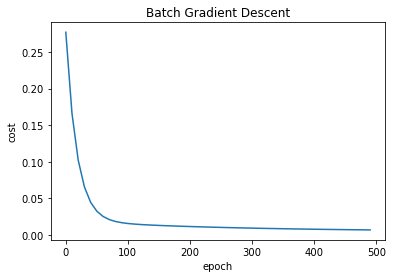

In [432]:
graph(epoch_list,cost_list,"Batch Gradient Descent")

In [433]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [434]:
scaled_X.shape

(20, 2)

In [435]:
predict(1056,2,w,b)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


32.0964952553193

In [436]:
def stochastic_gd(X,y_true,epochs,learning_rate=0.1):
    number_of_features = X.shape[1]
    w = np.ones(number_of_features)
    b = 0
    number_of_samples =X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):   
        random_index = random.randint(0,number_of_samples-1)
        sample_X = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w,sample_X)+b
        
        wd =-(2/number_of_samples)*np.dot((sample_y-y_predicted),sample_X)
        bd = -2*np.mean(sample_y-y_predicted)
        
        w =w -learning_rate*wd
        b = b - learning_rate*b
        
        cost = np.mean(np.square(sample_y-y_predicted))
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b,cost,cost_list,epoch_list

       



In [437]:
w_sgd,b_sgd,cost,cost_list_sgd,epoch_list_sgd= stochastic_gd(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)


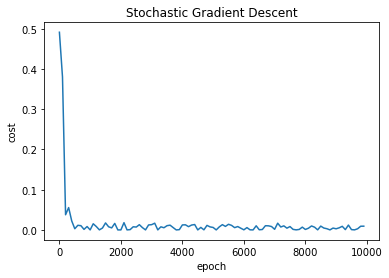

In [438]:
graph(epoch_list_sgd,cost_list_sgd,"Stochastic Gradient Descent")

In [439]:
np.random.permutation(20)

array([15, 17,  5,  2, 14,  7,  4,  1, 10, 19,  6,  3,  0,  8, 11,  9, 18,
       13, 12, 16])

In [440]:
scaled_X[np.random.permutation(20)]

array([[0.25517241, 0.5       ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.22068966, 0.5       ],
       [0.34482759, 0.5       ],
       [0.24862069, 0.5       ],
       [0.        , 0.        ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.12931034, 0.25      ],
       [0.68448276, 0.75      ],
       [0.67931034, 0.5       ],
       [0.13103448, 0.5       ],
       [0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.12758621, 0.25      ],
       [0.13793103, 0.25      ],
       [0.5       , 0.5       ]])

In [441]:
predict(1056,2,w_sgd,b_sgd)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


46.12468051846625

In [442]:
def mini_batch_gradient_descent(X,y_true,epochs =100 ,batch_size = 5 ,learning_rate =0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    if batch_size > total_samples:
        batch_size =total_samples
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w,Xj.T)+b
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*(np.sum(yj-y_predicted))
            w = w-learning_rate*w_grad
            b = b-learning_rate*b_grad
            
            cost = np.mean(np.square(yj-y_predicted))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
            
    

In [443]:
w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
cost_list_mbgd

[0.3131744762109976,
 0.08190213324859388,
 0.004652233547556651,
 0.02189189093694039,
 0.003744960932501979,
 0.005048897032315206,
 0.007937015542982843,
 0.004159342113522778,
 0.0036949158589769495,
 0.004193346173793556,
 0.016332850117154258,
 0.01268508354806105]

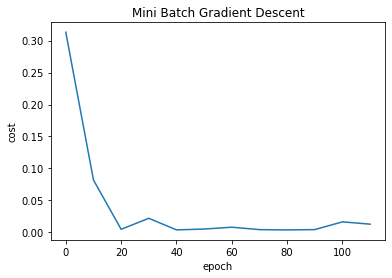

In [444]:
graph(epoch_list_mbgd,cost_list_mbgd,"Mini Batch Gradient Descent")

In [445]:
predict(1056,2,w_mbgd, b_mbgd)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


31.833418063200355